# Dispersion Coefficients Near Surfaces

Reproducing results from old pairinteraction software (see [here](https://www.pairinteraction.org/pairinteraction/v0.9.10/examples_python/vdw_near_surface.html) and [here](https://www.pairinteraction.org/pairinteraction/v0.9.10/examples_python/pair_potential_near_surface.html))

In [1]:
# %pip install -q pairinteraction # Uncomment for installation on Colab

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi
from pairinteraction.green_tensor import GreenTensorSurface

if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

In [2]:
ket1 = pi.KetAtom("Rb", n=69, l=0, j=0.5, m=0.5)
ket2 = pi.KetAtom("Rb", n=72, l=0, j=0.5, m=0.5)

distance_atoms = 10.0  # micrometer
distance_surface_list = np.linspace(0.05 * distance_atoms, 2 * distance_atoms, 100)

c6_list = []
for z in distance_surface_list:
    eff_system = pi.EffectiveSystemPair([(ket1, ket2), (ket2, ket1)])

    gt = GreenTensorSurface(
        [0, 0, 0], [distance_atoms, 0, 0], z=-z, unit="micrometer", static_limit=True
    )
    eff_system.system_pair.set_green_tensor(gt)

    eff_h = eff_system.get_effective_hamiltonian(return_order=2, unit="GHz")
    c6 = -eff_h[0, 0] * (distance_atoms**6)  # GHz um^6
    c6_list.append(c6)

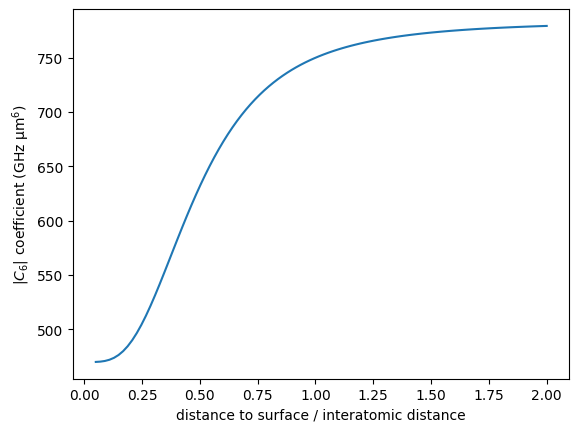

In [3]:
fig, ax = plt.subplots()
ax.plot(distance_surface_list / distance_atoms, np.abs(c6_list))
ax.set_xlabel("distance to surface / interatomic distance")
ax.set_ylabel("$|C_6|$ coefficient (GHz μm$^6$)")
plt.show()